In [1]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
mnist = keras.datasets.mnist

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print("x_train:", x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
x_train1=x_train.reshape(60000,784)
x_test1=x_test.reshape(10000,784)

y_train1=keras.utils.to_categorical(y_train,10)
y_test1=keras.utils.to_categorical(y_test,10)
print("y_train_categorical:",y_train1.shape)
print("y_test_categorical:",y_test1.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
y_train_categorical: (60000, 10)
y_test_categorical: (10000, 10)


In [12]:
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(200, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.98),
#   tf.keras.layers.Dense(200, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.98),                                    
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])

Dropout_en=0

model = tf.keras.models.Sequential()  
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation='relu',input_dim=784))
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(200, activation='relu',input_dim=200))
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax',input_dim=200))  

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#history=model.fit(x_train, y_train1, epochs=5)
history=model.fit(x_train1, y_train1, batch_size=500, epochs=10, validation_data=(x_test1,y_test1))

test_result=model.evaluate(x_test1, y_test1)
print("Test Accuracy::",test_result[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 12us/sample - loss: 0.4200 - acc: 0.8800 - val_loss: 0.1848 - val_acc: 0.9438
Epoch 2/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.1699 - acc: 0.9492 - val_loss: 0.1670 - val_acc: 0.9510
Epoch 3/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.1167 - acc: 0.9650 - val_loss: 0.1055 - val_acc: 0.9673
Epoch 4/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0859 - acc: 0.9746 - val_loss: 0.0891 - val_acc: 0.9726
Epoch 5/10
60000/60000 [==============================] - 1s 11us/sample - loss: 0.0657 - acc: 0.9805 - val_loss: 0.0797 - val_acc: 0.9756
Epoch 6/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0533 - acc: 0.9835 - val_loss: 0.0764 - val_acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 1s 10us/sample - loss: 0.0416 - acc: 0.9865 - val_loss: 0.

array([[7, 2, 1, 0, 4],
       [1, 4, 9, 5, 9],
       [0, 6, 9, 0, 1],
       [5, 9, 7, 3, 4],
       [9, 6, 6, 5, 4]])

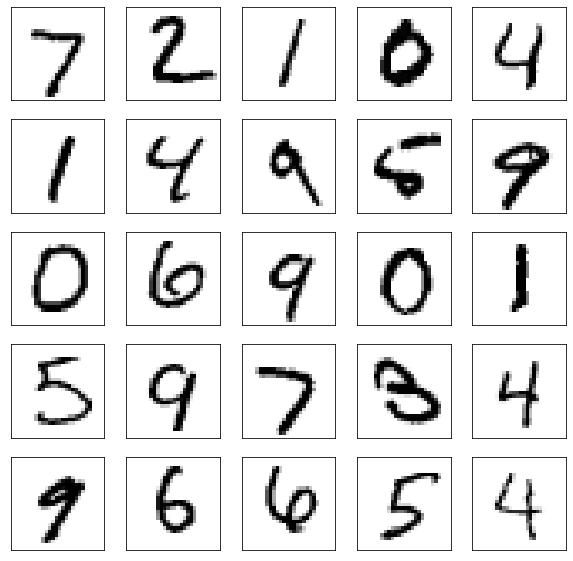

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)

predict_val=model.predict(x_test1)
predict_label=predict_val.argmax(axis=1)
predict_label[:25].reshape(5,5)


Text(0.5, 1.0, 'Accuracy Curves')

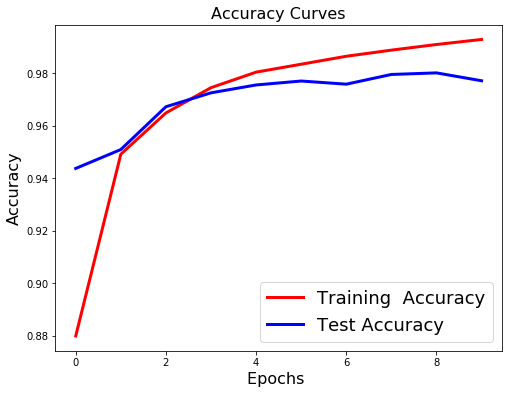

In [14]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training  Accuracy', 'Test Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)